In [91]:
import os
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [92]:
df = pd.read_csv('hotel_bookings_updated_2024.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [94]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2024.0,26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.0,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2024.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2024.0,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2024.0,26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2024.0,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2024.0,52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [95]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
count,119390,119390.000000,119390.000000,119390.0,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390
unique,30,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,3,75629,15
top,City Hotel - Ahmedabad,NaN,NaN,NaN,October,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2024-01-13 19:56:56.304684686,Bhopal
freq,5405,NaN,NaN,NaN,10349,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,8,8104
mean,NaN,0.370416,104.011416,2024.0,NaN,26.375835,15.723394,0.927599,2.500302,1.856403,...,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.0,NaN,15.021596,8.805079,0.998613,1.908286,0.579261,...,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2024.0,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2024.0,NaN,13.000000,8.000000,0.000000,1.000000,2.000000,...,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2024.0,NaN,26.000000,16.000000,1.000000,2.000000,2.000000,...,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2024.0,NaN,39.000000,23.000000,2.000000,3.000000,2.000000,...,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN


# Features

### Feature Descriptions – Hotel Booking Dataset

1. **hotel** – Combined feature indicating both the hotel type (Resort Hotel or City Hotel) and the city where the hotel is located. **Example**: *"Resort Hotel - Mumbai"*, *"City Hotel - Bangalore"*
2. **is_canceled** – Indicates whether the booking was canceled (1 = canceled, 0 = not canceled).
3. **lead_time** – Number of days between the booking date and the arrival date.
4. **arrival_date_year** – Year when the guest was scheduled to arrive. **Example**: only *2024*
5. **arrival_date_month** – Month when the guest was scheduled to arrive. **Example**: *July*, *September*, *August*
6. **arrival_date_week_number** – Week number of the year corresponding to the arrival date.
7. **arrival_date_day_of_month** – Day of the month of the arrival date.
8. **stays_in_weekend_nights** – Number of weekend nights (Saturday, Sunday) the guest stayed or booked.
9. **stays_in_week_nights** – Number of week nights (Monday–Friday) the guest stayed or booked.
10. **adults** – Number of adults in the booking.
11. **children** – Number of children in the booking.
12. **babies** – Number of babies in the booking.
13. **meal** – Type of meal package included. **Example** *BB* = bed & breakfast
14. **country** – Country of origin of the guest.
15. **market_segment** – Market segment that generated the booking. **Example** *Online TA*, *Corporate*
16. **distribution_channel** – Channel through which the booking was made. **Example** *TA/TO*, *Direct*
17. **is_repeated_guest** – Indicates if the guest has booked before (1 = yes, 0 = no).
18. **previous_cancellations** – Number of previous bookings by this guest that were canceled.
19. **previous_bookings_not_canceled** – Number of previous bookings by this guest that were not canceled.
20. **reserved_room_type** – Code of the room type initially reserved.
21. **assigned_room_type** – Code of the room type actually assigned.
22. **booking_changes** – Number of changes made to the booking.
23. **deposit_type** – Indicates whether a deposit was required (No Deposit, Refundable, Non-Refundable).
24. **agent** – ID of the travel agency that made the booking.
25. **company** – ID of the company that made the booking.
26. **days_in_waiting_list** – Number of days the booking was kept on a waiting list.
27. **customer_type** – Category of customer (Transient, Contract, Transient-Party, Group).
28. **adr** – Average Daily Rate (price per day of stay).
29. **required_car_parking_spaces** – Number of car parking spaces requested.
30. **total_of_special_requests** – Total number of special requests made.
31. **reservation_status** – Current status of the reservation (Canceled, Check-Out, No-Show).
32. **reservation_status_date** – Date corresponding to the reservation status.
33. **city** – City where the hotel is located / where the reservation is registered.


# Task

Given the booking information, predict whether a reservation will be canceled.

Target column: **is_cancelled**

# Removing features

## Data leakage features

Features **reservation_status** and **reservation_status_date** reveal the actual final reservation outcome (Canceled, No-Show, Check-Out).

Because these values are known only after the reservation ends, they must be removed to prevent data leakage.

In [96]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [97]:
df['reservation_status_date'].unique()

array(['2024-07-27 22:16:40.916332324', '2024-04-28 21:56:21.507509066',
       '2024-09-10 03:46:25.734029096', ...,
       '2024-05-08 23:55:31.512953454', '2024-09-29 05:33:06.002060492',
       '2024-04-19 07:50:22.982016768'], shape=(75629,), dtype=object)

In [98]:
df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True,errors='ignore')

## Identifier-like features

The features **agent** and **company** contain a very high percentage of missing values and represent mostly meaningless numeric identifiers with no semantic interpretability.

Such ID-like variables do not contribute useful information to the model and may introduce noise.

Therefore, both features are removed from the dataset.

In [99]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [100]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [101]:
missing_df = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percent': df.isna().mean() * 100
})

missing_df = missing_df[missing_df['missing_count'] > 0]
missing_df.sort_values('missing_percent', ascending=False, inplace=True)
missing_df

,missing_count,missing_percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


In [102]:
df.drop(columns=['company', 'agent'], inplace=True,errors='ignore')

## Useless features

The city feature provides no new information because the hotel’s location is already embedded in the hotel column (e.g., “Resort Hotel – Goa”).

Therefore, city is redundant and can be safely removed to avoid multicollinearity and duplicate information.

In [103]:
len(df['hotel'])==len(df['city'])

True

In [104]:
df.groupby('hotel')['city'].unique()

hotel
City Hotel - Ahmedabad        [Ahmedabad]
City Hotel - Bangalore        [Bangalore]
City Hotel - Bhopal              [Bhopal]
City Hotel - Chandigarh      [Chandigarh]
City Hotel - Chennai            [Chennai]
City Hotel - Delhi                [Delhi]
City Hotel - Goa                    [Goa]
City Hotel - Hyderabad        [Hyderabad]
City Hotel - Indore              [Indore]
City Hotel - Jaipur              [Jaipur]
City Hotel - Kochi                [Kochi]
City Hotel - Kolkata            [Kolkata]
City Hotel - Lucknow            [Lucknow]
City Hotel - Mumbai              [Mumbai]
City Hotel - Pune                  [Pune]
Resort Hotel - Ahmedabad      [Ahmedabad]
Resort Hotel - Bangalore      [Bangalore]
Resort Hotel - Bhopal            [Bhopal]
Resort Hotel - Chandigarh    [Chandigarh]
Resort Hotel - Chennai          [Chennai]
Resort Hotel - Delhi              [Delhi]
Resort Hotel - Goa                  [Goa]
Resort Hotel - Hyderabad      [Hyderabad]
Resort Hotel - Indore       

In [105]:
df.drop(columns=['city','arrival_date_year'], inplace=True,errors='ignore')

# Dealing with missing values

In [106]:
df.isnull().sum().sort_values(ascending=False)

country                           488
children                            4
hotel                               0
is_repeated_guest                   0
required_car_parking_spaces         0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
reserved_room_type                  0
previous_bookings_not_canceled      0
previous_cancellations              0
market_segment                      0
distribution_channel                0
is_canceled                         0
meal                                0
babies                              0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date_day_of_month           0
arrival_date_week_number            0
arrival_date_month                  0
lead_time                           0
total_of_spe

In [107]:
df = df.dropna(subset=['children'])
df['country'] = df['country'].fillna('Unknown')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  meal                            119386 non-null  object 
 12  country              

# Dealing with Undefined values

## Distribution channel

Replace "Undefined" → "TA/TO" (Travel_Agency/Tour_Operator) most common value

In [109]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        1
Name: count, dtype: int64

In [110]:
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97871
Direct       14645
Corporate     6677
GDS            193
Name: count, dtype: int64

## Meal

In [111]:
df['meal'].value_counts()

meal
BB           92306
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [112]:
df['meal'] = df['meal'].replace('Undefined', 'SC')
df['meal'].value_counts()

meal
BB    92306
HB    14463
SC    11819
FB      798
Name: count, dtype: int64

# Splitting hotel feature

In [113]:
df[['hotel_type', 'hotel_city']] = df['hotel'].str.split(' - ', expand=True)
df = df.drop(columns=['hotel'],errors='ignore')

# Feature engineering features

## Total nights

This feature represents the **total length of stay** for each reservation.

`total_nights = stays_in_weekend_nights + stays_in_week_nights`

**Why it is useful:**
- Longer stays are more likely to be cancelled because they are more expensive and harder for guests to commit to.
- Short stays often have lower cancellation risk.
- Many ML models perform better when week vs. weekend nights are combined into a single continuous variable.

In [114]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

## Total people

This feature represents the **total number of guests** included in the booking.

`total_people = adults + children + babies`

**Why it is useful:**
- Bookings with more people typically require more planning and coordination.
- Family or group trips may have different cancellation patterns than solo travelers.
- Some studies show that single travelers cancel more often.

In [115]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

## Is family

A binary feature indicating whether the booking is made by a **family** (children/babies present) or **non-family**.

`is_family = 1 if (children + babies > 0) else 0`

**Why it is useful:**
- Families tend to cancel less frequently because trips require long-term planning.
- Non-family or solo bookings sometimes show higher cancellation rates.
- A binary flag helps tree-based models capture this behavior quickly.

In [116]:
df['is_family'] = (df['children'] + df['babies'] > 0).astype(int)

# Encoding categorical columns

In [117]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'hotel_type', 'hotel_city'],
      dtype='object')


In [118]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

## Ordinal encoding

In [119]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Only encode if the column exists AND still contains strings
if 'arrival_date_month' in df.columns:
    if df['arrival_date_month'].dtype == 'object':
        df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

In [120]:
df['arrival_date_month'].unique()

array([ 7,  4,  9,  8, 10,  1, 12,  3,  6, 11,  2,  5])

## One hot encoding

In [121]:
one_hot_cols = [
    'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'hotel_type', 'hotel_city'
]

# Filter only columns that still exist in df
cols_to_encode = [col for col in one_hot_cols if col in df.columns]

if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 74 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119386 non-null  int64  
 1   lead_time                       119386 non-null  int64  
 2   arrival_date_month              119386 non-null  int64  
 3   arrival_date_week_number        119386 non-null  int64  
 4   arrival_date_day_of_month       119386 non-null  int64  
 5   stays_in_weekend_nights         119386 non-null  int64  
 6   stays_in_week_nights            119386 non-null  int64  
 7   adults                          119386 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119386 non-null  int64  
 10  country                         119386 non-null  object 
 11  is_repeated_guest               119386 non-null  int64  
 12  previous_cancellation

## Frequency encoding

In [123]:
if 'country' in df.columns:
    freq = df['country'].value_counts()
    df['country_freq'] = df['country'].map(freq)
    df.drop(columns=['country'], inplace=True)

In [124]:
df['country_freq'].unique()

array([48586, 12129,  2097,  8568,  3375, 10415,   488,   500,   607,
          18,   214,   919,  7287,  2342,  1730,  1279,   128,  3766,
        2104,   435,   632,  1024,   426,    83,   171,  2224,   447,
          67,     1,   287,    57,    12,   152,   999,    85,   259,
          68,    55,   101,    65,  1263,    26,    81,   248,    80,
         362,   669,     2,    24,     4,   103,   133,    19,   230,
          51,    39,     6,   100,    29,    22,     7,    32,     8,
           5,    71,     3,    16,    34,    14,    35,    31,    40,
          11,    17,    74,    59,    10,    28,   197,    13,    75,
          21,    48,    15,    27,     9])

# Helping functions

In [125]:
def plot_confusion_matrix_percent(y_test, y_pred, title='Confusion Matrix'):

    # Build confusion matrix
    cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

    # Normalize rows → percentages
    cm_percent = cm.div(cm.sum(axis=1), axis=0) * 100

    # Annotation: "89.3% (13350)"
    annot = cm_percent.map(lambda x: f"{x:.1f}%") + cm.map(lambda x: f"\n({x})")

    # Plot
    plt.figure(figsize=(6,4))
    seaborn.heatmap(
        cm_percent,
        annot=annot.values.reshape(cm_percent.shape),
        fmt="",
        cmap="Blues",
        xticklabels=["Not Canceled", "Canceled"],
        yticklabels=["Not Canceled", "Canceled"]
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def classification_report_table(y_test, y_pred):
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Clean row names
    report_df.index = [
        "Not Canceled (0)",
        "Canceled (1)",
        "Accuracy",
        "Macro Avg",
        "Weighted Avg"
    ]
    # Styled table
    display(report_df.style.background_gradient(cmap="Blues").format("{:.3f}"))

# Linear regression

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separate features and target
X_raw = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Fit + transform
X_scaled = scaler.fit_transform(X_raw)

# DataFrame with same column names
X_scaled = pd.DataFrame(X_scaled, columns=X_raw.columns)

# Reattach target
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Final X and y
X = df_scaled.drop(columns=['is_canceled'])
y = df_scaled['is_canceled']

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def run_logistic_regression(X, y, test_size=0.2, random_state=42, show_accuracy=True):
    """
    Train and evaluate a Logistic Regression model.

    Parameters:
        X (pd.DataFrame or np.ndarray): Feature matrix
        y (pd.Series or np.ndarray): Target vector
        test_size (float): Test set proportion
        random_state (int): Random seed

    Returns:
        y_test, y_pred
        :param show_accuracy:
    """

    # 1. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # 2. Define model
    model = LogisticRegression(
        max_iter=3000,
        solver='lbfgs'
    )

    # 3. Train model
    model.fit(X_train, y_train)

    # 4. Predict
    y_pred = model.predict(X_test)

    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    # 5. Evaluate
    if show_accuracy:
        print("Train Accuracy:", test_acc)
        print("Test Accuracy :", train_acc)

    return y_test, y_pred, test_acc, train_acc

In [129]:
y_test_lr, y_pred_lr, train_acc_lr, test_acc_lr = run_logistic_regression(df_scaled.drop(columns=['is_canceled']), df['is_canceled'])

Train Accuracy: 0.8060139040120613
Test Accuracy : 0.8087804163002053


,precision,recall,f1-score,support
Not Canceled (0),0.806,0.912,0.855,15034.000
Canceled (1),0.807,0.626,0.705,8844.000
Accuracy,0.806,0.806,0.806,0.806
Macro Avg,0.806,0.769,0.780,23878.000
Weighted Avg,0.806,0.806,0.800,23878.000


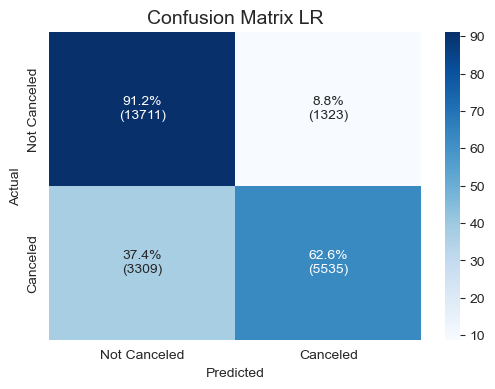

In [130]:
classification_report_table(y_test_lr, y_pred_lr)
plot_confusion_matrix_percent(y_test_lr, y_pred_lr, title='Confusion Matrix LR')

# Feature selection

In [131]:
features = df.drop(columns=['is_canceled'])
target = df['is_canceled']

## Filter methods

Filter methods evaluate each feature independently with target variable. Feature with high correlation with target variable are selected as it means this feature has some relation and can help us in making predictions. These methods are used in the preprocessing phase to remove irrelevant or redundant features based on statistical tests (correlation) or other criteria.

![Filter](filter.png)

### Variance Threshold

In [132]:
from sklearn.feature_selection import VarianceThreshold

X = df.drop(columns=["is_canceled"])
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

selected_mask = selector.get_support()
selected_features_var = X.columns[selected_mask]
removed_features = X.columns[~selected_mask]

print("Selected features:", list(selected_features_var))
print("\nRemoved features:", list(removed_features))

Selected features: ['lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_people', 'is_family', 'meal_HB', 'meal_SC', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'distribution_channel_TA/TO', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'deposit_type_Non Refund', 'customer_type_Transient', 'customer_type_Transient-Party', 'hotel_type_Resort Hotel', 'hot

In [133]:
variances = selector.variances_
mask = selector.get_support()

# build detailed table
variance_details = pd.DataFrame({
    "feature": X.columns,
    "variance_sklearn": variances,
    "selected": mask
}).sort_values("variance_sklearn")

variance_details.head(10)

,feature,variance_sklearn,selected
50,assigned_room_type_L,0.000008,False
39,reserved_room_type_L,0.000050,False
51,assigned_room_type_P,0.000101,False
40,reserved_room_type_P,0.000101,False
53,deposit_type_Refundable,0.001355,False
30,distribution_channel_GDS,0.001614,False
49,assigned_room_type_K,0.002331,False
48,assigned_room_type_I,0.003031,False
54,customer_type_Group,0.004810,False
38,reserved_room_type_H,0.005009,False


In [135]:
y_test_var, y_pred_var, train_acc_var, test_acc_var = run_logistic_regression(df_scaled[selected_features_var], df['is_canceled'])

Train Accuracy: 0.8050506742608259
Test Accuracy : 0.8073564518155547


,precision,recall,f1-score,support
Not Canceled (0),0.804,0.912,0.855,15034.000
Canceled (1),0.807,0.622,0.703,8844.000
Accuracy,0.805,0.805,0.805,0.805
Macro Avg,0.806,0.767,0.779,23878.000
Weighted Avg,0.805,0.805,0.799,23878.000


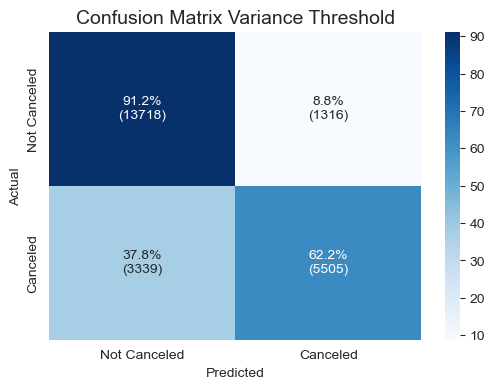

In [136]:
classification_report_table(y_test_var, y_pred_var)
plot_confusion_matrix_percent(y_test_var, y_pred_var, title='Confusion Matrix Variance Threshold')

Applying Variance Threshold removed only features with extremely low variability (mostly rare categorical dummy variables and nearly constant features).

These features provide no discriminative power because their values do not change for most samples.

After removing them, the logistic regression model produced almost identical performance compared to using all features.

This confirms that Variance Threshold successfully eliminated irrelevant features without harming model accuracy.

### Mutual Information

In [137]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop(columns=["is_canceled"])
y = df["is_canceled"]

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

mi_df = (
    mi_series.reset_index()
    .rename(columns={"index": "feature", 0: "mi_score"})
)

mi_df

,feature,mi_score
0,deposit_type_Non Refund,0.130488
1,lead_time,0.081091
2,adr,0.079250
3,country_freq,0.069467
4,previous_cancellations,0.042156
...,...,...
68,reserved_room_type_E,0.000000
69,hotel_city_Bhopal,0.000000
70,assigned_room_type_G,0.000000
71,assigned_room_type_L,0.000000


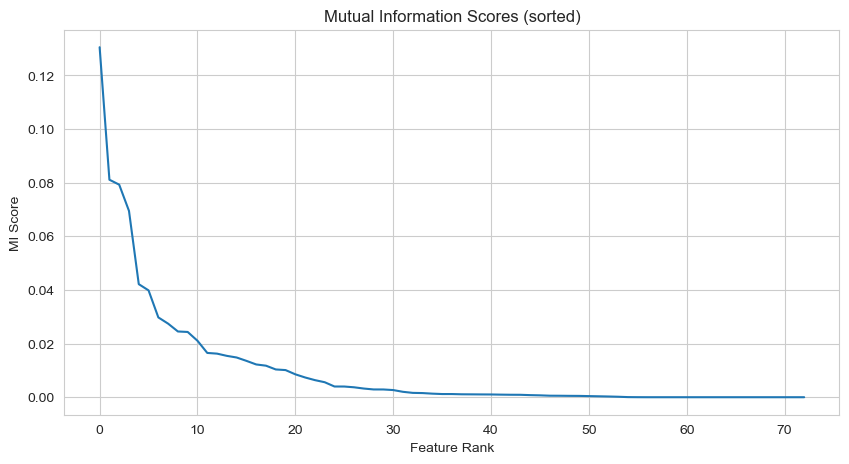

In [138]:
plt.figure(figsize=(10,5))
plt.plot(mi_df["mi_score"].values)
plt.title("Mutual Information Scores (sorted)")
plt.xlabel("Feature Rank")
plt.ylabel("MI Score")
plt.grid(True)
plt.show()

In [139]:
k_values = [15, 20, 25, 30, 35, 40]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = mi_df.head(k)["feature"].tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

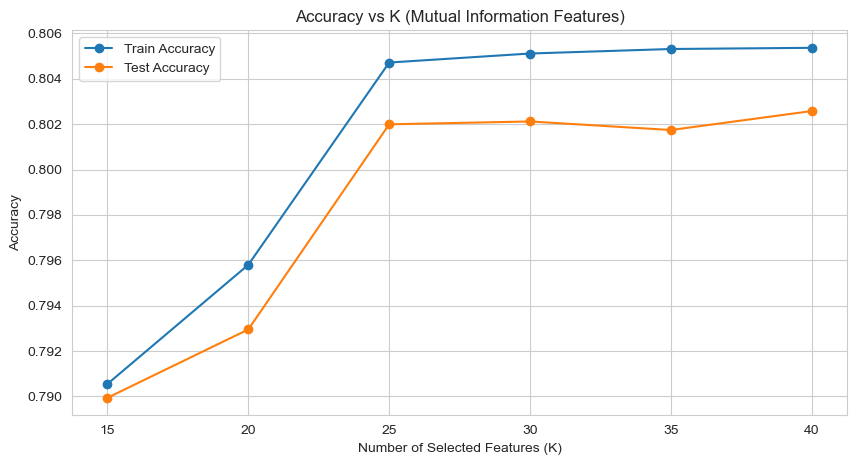

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Mutual Information Features)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [141]:
k = 25
top25_features_mi = mi_df.head(k)["feature"].tolist()
top25_features_mi

['deposit_type_Non Refund',
 'lead_time',
 'adr',
 'country_freq',
 'previous_cancellations',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'distribution_channel_TA/TO',
 'customer_type_Transient',
 'market_segment_Groups',
 'booking_changes',
 'total_nights',
 'market_segment_Direct',
 'days_in_waiting_list',
 'hotel_type_Resort Hotel',
 'distribution_channel_Direct',
 'total_people',
 'previous_bookings_not_canceled',
 'assigned_room_type_D',
 'stays_in_week_nights',
 'customer_type_Transient-Party',
 'adults',
 'market_segment_Online TA',
 'reserved_room_type_D',
 'assigned_room_type_K']

In [142]:
y_test_mi, y_pred_mi, train_acc_mi, test_acc_mi = run_logistic_regression(df_scaled[top25_features_mi], df['is_canceled'])

Train Accuracy: 0.8019934667895133
Test Accuracy : 0.804717929388114


,precision,recall,f1-score,support
Not Canceled (0),0.800,0.914,0.853,15034.000
Canceled (1),0.806,0.612,0.696,8844.000
Accuracy,0.802,0.802,0.802,0.802
Macro Avg,0.803,0.763,0.775,23878.000
Weighted Avg,0.803,0.802,0.795,23878.000


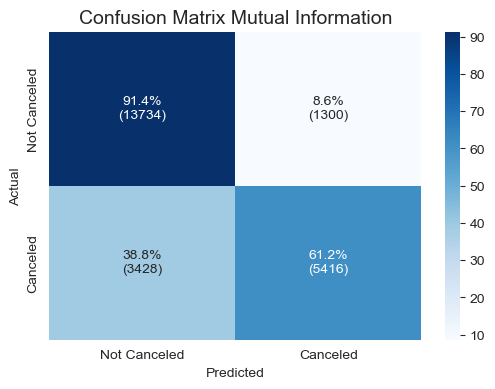

In [143]:
classification_report_table(y_test_mi, y_pred_mi)
plot_confusion_matrix_percent(y_test_mi, y_pred_mi, title='Confusion Matrix Mutual Information')

In [144]:
print("Selected features:", list(top25_features_mi))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top25_features_mi)]))

Selected features: ['deposit_type_Non Refund', 'lead_time', 'adr', 'country_freq', 'previous_cancellations', 'total_of_special_requests', 'required_car_parking_spaces', 'distribution_channel_TA/TO', 'customer_type_Transient', 'market_segment_Groups', 'booking_changes', 'total_nights', 'market_segment_Direct', 'days_in_waiting_list', 'hotel_type_Resort Hotel', 'distribution_channel_Direct', 'total_people', 'previous_bookings_not_canceled', 'assigned_room_type_D', 'stays_in_week_nights', 'customer_type_Transient-Party', 'adults', 'market_segment_Online TA', 'reserved_room_type_D', 'assigned_room_type_K']

Removed features: ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'children', 'babies', 'is_repeated_guest', 'is_family', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Offline TA/TO', 'distribution_channel_GDS', 'reserved_room_type_B', 'reserved_room_type_C', 'reserv

### Mean Absolute Difference

In [145]:
import numpy as np

# X = your DataFrame of features (without target)
X = df.drop(columns=['is_canceled'])
X_no_country = X.drop(columns=["country_freq"]) # since MAD for country_freq is 20458.8352313161

# Compute MAD for each feature
mad_scores = X_no_country.apply(lambda col: np.mean(np.abs(col - col.mean())))

# Convert to a nice DataFrame
mad_df = mad_scores.sort_values(ascending=False).to_frame(name='mad_score')
mad_df.head(10)

,mad_score
lead_time,84.672218
adr,36.379708
arrival_date_week_number,13.008534
arrival_date_day_of_month,7.625473
days_in_waiting_list,4.498946
arrival_date_month,2.983513
total_nights,1.751269
stays_in_week_nights,1.364284
stays_in_weekend_nights,0.807996
total_of_special_requests,0.673035


In [146]:
mad_df.to_csv('mad_df.csv')

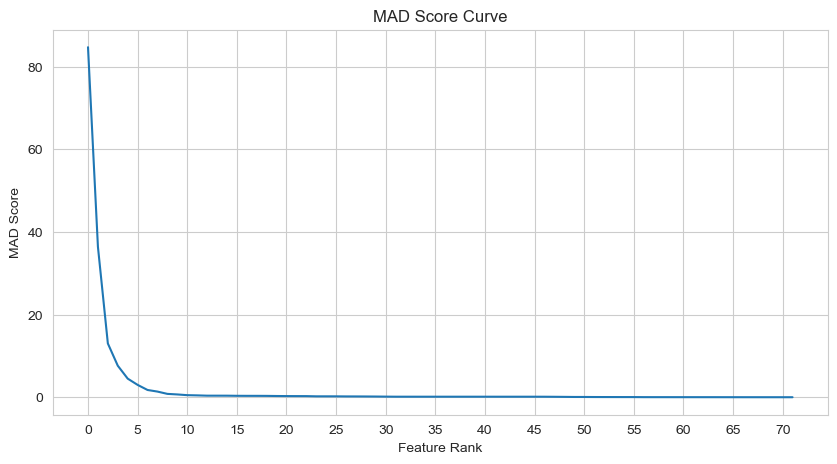

In [147]:
plt.figure(figsize=(10,5))
plt.plot(mad_df["mad_score"].values)
plt.title("MAD Score Curve")
plt.xlabel("Feature Rank")
plt.ylabel("MAD Score")
plt.grid(True)
plt.xticks(np.arange(0, len(mad_df["mad_score"].values), 5))
plt.show()

In [148]:
top30_mad = mad_df.head(30).index.tolist()
y_test, y_pred, train_acc_mad, test_acc_mad = run_logistic_regression(df_scaled[top30_mad], df["is_canceled"])

Train Accuracy: 0.8010721165926794
Test Accuracy : 0.8032416132679985


In [149]:
k_values = [10, 15, 20, 25, 30, 35]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = mad_df.head(k).index.tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

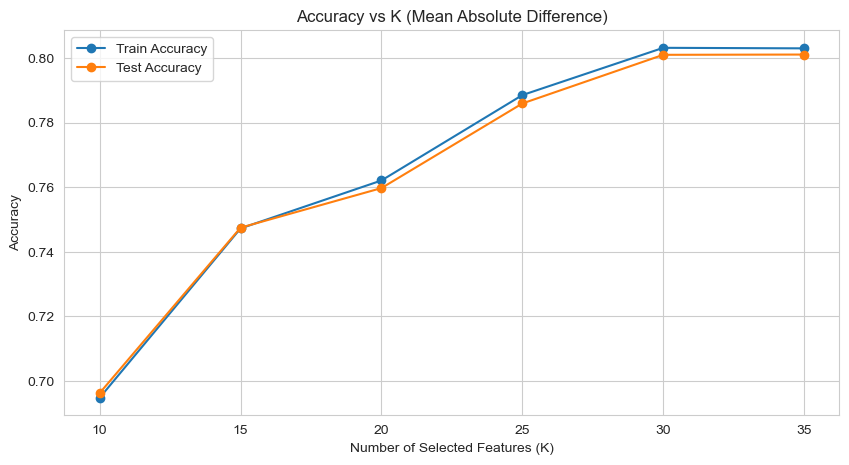

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Mean Absolute Difference)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [151]:
top30_mad = mad_df.head(30).index.tolist()
y_test_mad, y_pred_mad, _, _ = run_logistic_regression(df_scaled[top30_mad], df["is_canceled"])

Train Accuracy: 0.8010721165926794
Test Accuracy : 0.8032416132679985


,precision,recall,f1-score,support
Not Canceled (0),0.786,0.940,0.856,15034.000
Canceled (1),0.847,0.565,0.678,8844.000
Accuracy,0.801,0.801,0.801,0.801
Macro Avg,0.817,0.752,0.767,23878.000
Weighted Avg,0.809,0.801,0.790,23878.000


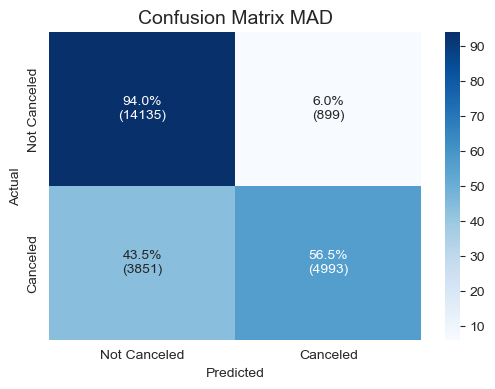

In [152]:
classification_report_table(y_test_mad, y_pred_mad)
plot_confusion_matrix_percent(y_test_mad, y_pred_mad, title='Confusion Matrix MAD')

In [153]:
print("Selected features:", list(top30_mad))
print("\nRemoved features:", list(df.columns[~df.columns.isin(top30_mad)]))

Selected features: ['lead_time', 'adr', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'arrival_date_month', 'total_nights', 'stays_in_week_nights', 'stays_in_weekend_nights', 'total_of_special_requests', 'market_segment_Online TA', 'hotel_type_Resort Hotel', 'booking_changes', 'customer_type_Transient', 'total_people', 'adults', 'assigned_room_type_D', 'customer_type_Transient-Party', 'market_segment_Offline TA/TO', 'distribution_channel_TA/TO', 'market_segment_Groups', 'reserved_room_type_D', 'previous_bookings_not_canceled', 'distribution_channel_Direct', 'deposit_type_Non Refund', 'meal_HB', 'children', 'market_segment_Direct', 'meal_SC', 'previous_cancellations']

Removed features: ['is_canceled', 'babies', 'is_repeated_guest', 'required_car_parking_spaces', 'is_family', 'meal_FB', 'market_segment_Complementary', 'market_segment_Corporate', 'distribution_channel_GDS', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_E', 'reserve

### Chi-square test

In [154]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# X = all features, y = target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# 1. Scale features to 0–1 (Chi2 requires non-negative values)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 2. Run chi-square test
chi_scores, p_values = chi2(X_scaled, y)

# 3. Put into DataFrame
chi_df = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi_scores,
    'p_value': p_values
})

# 4. Sort by chi2 score descending
chi_df = chi_df.sort_values(by='chi2_score', ascending=False)

chi_df.head(10)

,feature,chi2_score,p_value
52,deposit_type_Non Refund,24295.637196,0.0
26,market_segment_Groups,4902.414807,0.0
72,country_freq,4870.536213,0.0
25,market_segment_Direct,2546.258079,0.0
29,distribution_channel_Direct,2407.493826,0.0
43,assigned_room_type_D,1541.563973,0.0
0,lead_time,1528.639642,0.0
57,hotel_type_Resort Hotel,1478.136011,0.0
56,customer_type_Transient-Party,1454.830910,0.0
16,total_of_special_requests,1446.965693,0.0


In [155]:
k_values = [10, 15, 20, 25, 30, 35, 40]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = chi_df['feature'].head(k).tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

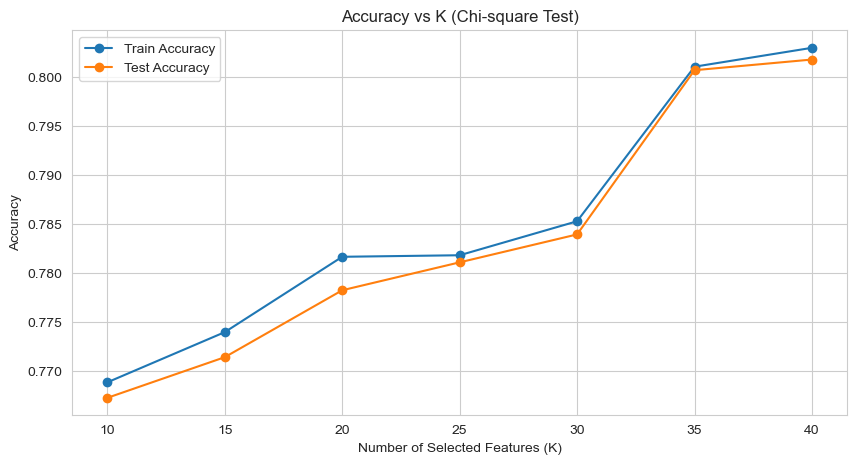

In [156]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Chi-square Test)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [157]:
top35_chi = chi_df['feature'].head(35).tolist()
y_test_chi, y_pred_chi, train_acc_chi, test_acc_chi = run_logistic_regression(df_scaled[top35_chi], df["is_canceled"])

Train Accuracy: 0.8006952006030655
Test Accuracy : 0.8010533149055576


,precision,recall,f1-score,support
Not Canceled (0),0.796,0.919,0.853,15034.000
Canceled (1),0.814,0.599,0.690,8844.000
Accuracy,0.801,0.801,0.801,0.801
Macro Avg,0.805,0.759,0.772,23878.000
Weighted Avg,0.802,0.801,0.793,23878.000


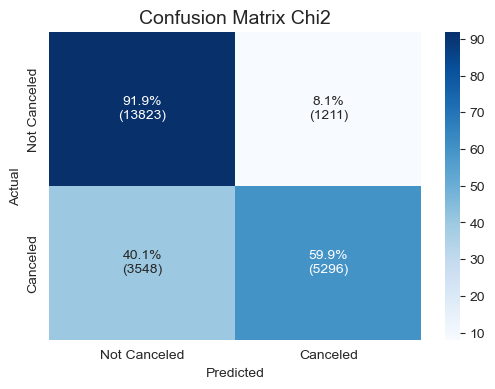

In [158]:
classification_report_table(y_test_chi, y_pred_chi)
plot_confusion_matrix_percent(y_test_chi, y_pred_chi, title='Confusion Matrix Chi2')

In [159]:
print("Selected features:", list(top35_chi))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top35_chi)]))

Selected features: ['deposit_type_Non Refund', 'market_segment_Groups', 'country_freq', 'market_segment_Direct', 'distribution_channel_Direct', 'assigned_room_type_D', 'lead_time', 'hotel_type_Resort Hotel', 'customer_type_Transient-Party', 'total_of_special_requests', 'is_repeated_guest', 'market_segment_Corporate', 'distribution_channel_TA/TO', 'required_car_parking_spaces', 'customer_type_Transient', 'assigned_room_type_E', 'previous_cancellations', 'assigned_room_type_C', 'assigned_room_type_F', 'booking_changes', 'reserved_room_type_D', 'assigned_room_type_I', 'market_segment_Complementary', 'meal_FB', 'customer_type_Group', 'assigned_room_type_B', 'reserved_room_type_E', 'assigned_room_type_K', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'market_segment_Offline TA/TO', 'reserved_room_type_F', 'assigned_room_type_G', 'meal_HB', 'distribution_channel_GDS']

Removed features: ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week

### Fisher's score

In [160]:
def fisher_score_binary(X, y):
    """
    Fisher score for binary classification (classes 0 and 1).
    X: DataFrame or array-like, shape (n_samples, n_features)
    y: Series/array-like, shape (n_samples,)
    """
    # Ensure DataFrame for easy column handling
    X = pd.DataFrame(X)
    y = np.asarray(y)

    if len(X) != len(y):
        raise ValueError("X and y must have the same number of rows")

    scores = {}

    mask0 = (y == 0)
    mask1 = (y == 1)

    for col in X.columns:
        x0 = X.loc[mask0, col]
        x1 = X.loc[mask1, col]

        mu0, mu1 = x0.mean(), x1.mean()
        var0, var1 = x0.var(), x1.var()

        scores[col] = (mu1 - mu0) ** 2 / (var1 + var0 + 1e-9)

    return pd.Series(scores).sort_values(ascending=False)


In [161]:
X_fs = df_scaled.drop(columns=["is_canceled"])

# Compute Fisher scores
fisher_scores  = fisher_score_binary(X_fs, df["is_canceled"])
fisher_df = fisher_scores.reset_index()
fisher_df.columns = ["feature", "fisher_score"]
fisher_df

,feature,fisher_score
0,deposit_type_Non Refund,4.812028e-01
1,country_freq,2.445954e-01
2,lead_time,1.881352e-01
3,total_of_special_requests,1.329396e-01
4,required_car_parking_spaces,1.072783e-01
...,...,...
68,hotel_city_Pune,1.529027e-06
69,arrival_date_month,6.892049e-07
70,reserved_room_type_L,6.480494e-07
71,hotel_city_Mumbai,6.192322e-07


In [162]:
k_values = [10, 20, 30, 40, 50, 60, 70]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = fisher_df['feature'].head(k).tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

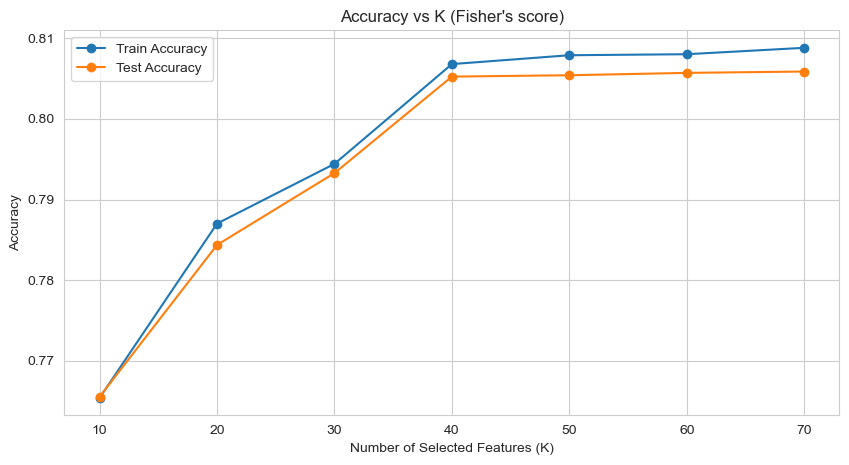

In [163]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Fisher's score)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [164]:
top40_fisher = fisher_df['feature'].head(40).tolist()
y_test_fisher, y_pred_fisher, train_acc_fisher, test_acc_fisher = run_logistic_regression(df_scaled[top40_fisher], df["is_canceled"])

Train Accuracy: 0.8052600720328336
Test Accuracy : 0.8068119948067177


,precision,recall,f1-score,support
Not Canceled (0),0.804,0.913,0.855,15034.000
Canceled (1),0.808,0.622,0.703,8844.000
Accuracy,0.805,0.805,0.805,0.805
Macro Avg,0.806,0.767,0.779,23878.000
Weighted Avg,0.806,0.805,0.799,23878.000


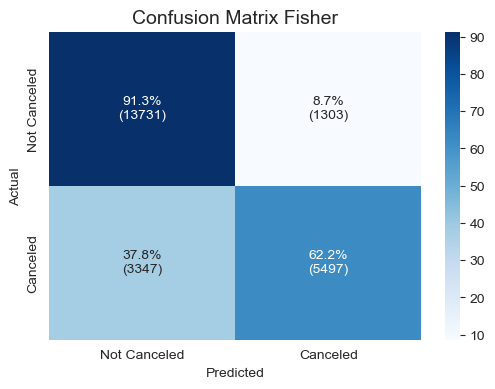

In [165]:
classification_report_table(y_test_fisher, y_pred_fisher)
plot_confusion_matrix_percent(y_test_fisher, y_pred_fisher, title='Confusion Matrix Fisher')

In [166]:
print("Selected features:", list(top40_fisher))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top40_fisher)]))

Selected features: ['deposit_type_Non Refund', 'country_freq', 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'market_segment_Groups', 'distribution_channel_TA/TO', 'market_segment_Direct', 'distribution_channel_Direct', 'booking_changes', 'hotel_type_Resort Hotel', 'customer_type_Transient', 'assigned_room_type_D', 'customer_type_Transient-Party', 'previous_cancellations', 'is_repeated_guest', 'market_segment_Corporate', 'assigned_room_type_E', 'previous_bookings_not_canceled', 'adults', 'assigned_room_type_C', 'days_in_waiting_list', 'reserved_room_type_D', 'assigned_room_type_F', 'adr', 'assigned_room_type_I', 'total_people', 'market_segment_Complementary', 'customer_type_Group', 'assigned_room_type_B', 'reserved_room_type_E', 'meal_FB', 'assigned_room_type_K', 'babies', 'market_segment_Offline TA/TO', 'stays_in_week_nights', 'reserved_room_type_F', 'assigned_room_type_G', 'meal_HB', 'total_nights']

Removed features: ['arrival_date_month', 'arrival_date_we

### Person Correlation Coefficient

In [167]:
import pandas as pd
import numpy as np

def pearson_fs(X, y):
    """
    Compute absolute Pearson correlation coefficient
    between each feature in X and target y.

    Returns a sorted pandas Series.
    """
    # Convert y to DataFrame for easy correlation
    y_df = pd.Series(y, name="target")

    # Compute correlations between X and y
    corr = X.apply(lambda col: col.corr(y_df))

    # Take absolute values (magnitude of relationship)
    corr = corr.abs()

    return corr.sort_values(ascending=False)

In [168]:
X_fs = df_scaled.drop(columns=["is_canceled"])

pearson_scores = pearson_fs(X_fs, df["is_canceled"])

pearson_df = pearson_scores.reset_index()
pearson_df.columns = ["feature", "pearson_corr"]

pearson_df.head(10)

,feature,pearson_corr
0,deposit_type_Non Refund,0.454665
1,lead_time,0.293840
2,country_freq,0.283638
3,total_of_special_requests,0.224139
4,market_segment_Groups,0.215182
5,required_car_parking_spaces,0.188642
6,distribution_channel_TA/TO,0.172176
7,market_segment_Direct,0.150310
8,distribution_channel_Direct,0.146069
9,hotel_type_Resort Hotel,0.136526


In [169]:
k_values = [10, 20, 30, 40, 50, 60, 70]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = fisher_df['feature'].head(k).tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

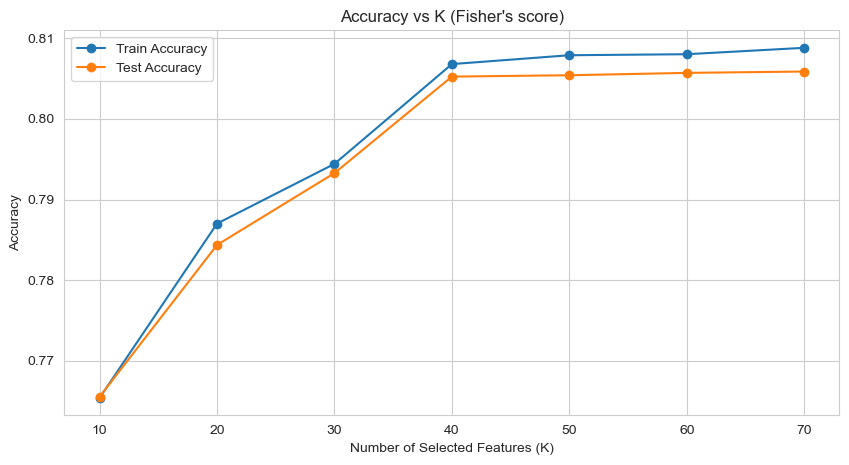

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Fisher's score)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [171]:
top40_person = pearson_df['feature'].head(40).tolist()
y_test_person, y_pred_person, train_acc_person, test_acc_person = run_logistic_regression(df_scaled[top40_person], df["is_canceled"])

Train Accuracy: 0.8056369880224474
Test Accuracy : 0.8069899903672991


,precision,recall,f1-score,support
Not Canceled (0),0.805,0.913,0.855,15034.000
Canceled (1),0.808,0.623,0.704,8844.000
Accuracy,0.806,0.806,0.806,0.806
Macro Avg,0.806,0.768,0.780,23878.000
Weighted Avg,0.806,0.806,0.799,23878.000


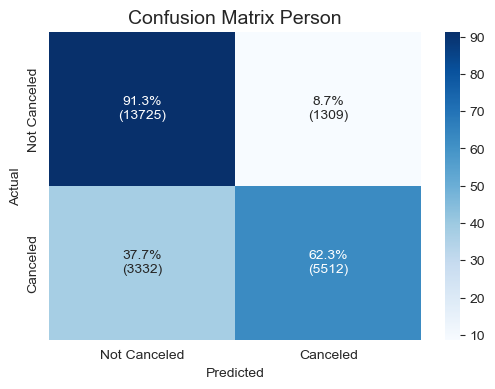

In [172]:
classification_report_table(y_test_person, y_pred_person)
plot_confusion_matrix_percent(y_test_person, y_pred_person, title='Confusion Matrix Person')

In [173]:
print("Selected features:", list(top40_person))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top40_person)]))

Selected features: ['deposit_type_Non Refund', 'lead_time', 'country_freq', 'total_of_special_requests', 'market_segment_Groups', 'required_car_parking_spaces', 'distribution_channel_TA/TO', 'market_segment_Direct', 'distribution_channel_Direct', 'hotel_type_Resort Hotel', 'booking_changes', 'customer_type_Transient', 'assigned_room_type_D', 'customer_type_Transient-Party', 'previous_cancellations', 'is_repeated_guest', 'market_segment_Corporate', 'days_in_waiting_list', 'assigned_room_type_E', 'previous_bookings_not_canceled', 'adults', 'assigned_room_type_C', 'reserved_room_type_D', 'assigned_room_type_F', 'total_people', 'assigned_room_type_I', 'adr', 'reserved_room_type_E', 'customer_type_Group', 'market_segment_Complementary', 'meal_FB', 'market_segment_Offline TA/TO', 'babies', 'assigned_room_type_K', 'assigned_room_type_B', 'meal_HB', 'reserved_room_type_F', 'stays_in_week_nights', 'assigned_room_type_G', 'distribution_channel_GDS']

Removed features: ['arrival_date_month', 'arr

### ANOVA F-test

In [174]:
from sklearn.feature_selection import f_classif

# X without target
X_fs = df_scaled.drop(columns=["is_canceled"])
y = df["is_canceled"]

# Compute F-scores and p-values
F_scores, p_values = f_classif(X_fs, y)

# Create DataFrame
anova_df = pd.DataFrame({
    "feature": X_fs.columns,
    "f_score": F_scores,
    "p_value": p_values
})

# Sort by strongest features (highest F-score)
anova_df = anova_df.sort_values("f_score", ascending=False)

anova_df.head(10)

,feature,f_score,p_value
52,deposit_type_Non Refund,36029.679382,0.0
72,country_freq,13925.973356,0.0
0,lead_time,11226.348503,0.0
16,total_of_special_requests,6959.888112,0.0
26,market_segment_Groups,6182.041909,0.0
15,required_car_parking_spaces,4743.830970,0.0
31,distribution_channel_TA/TO,3818.151238,0.0
25,market_segment_Direct,2916.325871,0.0
29,distribution_channel_Direct,2808.623037,0.0
12,booking_changes,2541.271636,0.0


In [175]:
k_values = [10, 20, 30, 40, 50, 60, 70]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = anova_df['feature'].head(k).tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

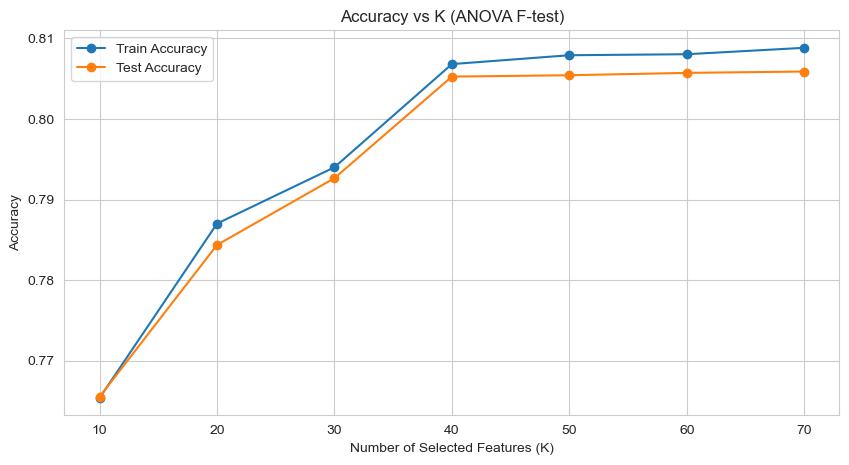

In [176]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (ANOVA F-test)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [177]:
top40_anova = anova_df['feature'].head(40).tolist()
y_test_anova, y_pred_anova, train_acc_anova, test_acc_anova = run_logistic_regression(df_scaled[top40_anova], df["is_canceled"])

Train Accuracy: 0.8052600720328336
Test Accuracy : 0.8068119948067177


,precision,recall,f1-score,support
Not Canceled (0),0.804,0.913,0.855,15034.000
Canceled (1),0.808,0.622,0.703,8844.000
Accuracy,0.805,0.805,0.805,0.805
Macro Avg,0.806,0.767,0.779,23878.000
Weighted Avg,0.806,0.805,0.799,23878.000


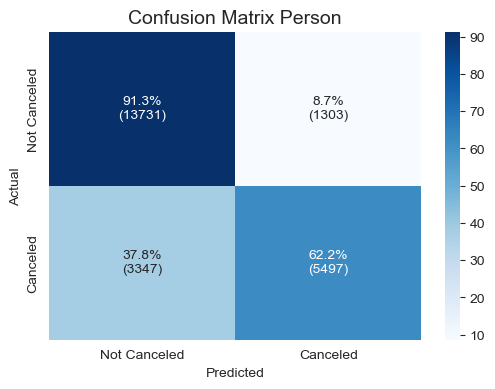

In [178]:
classification_report_table(y_test_anova, y_pred_anova)
plot_confusion_matrix_percent(y_test_anova, y_pred_anova, title='Confusion Matrix Person')

In [179]:
print("Selected features:", list(top40_anova))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top40_anova)]))

Selected features: ['deposit_type_Non Refund', 'country_freq', 'lead_time', 'total_of_special_requests', 'market_segment_Groups', 'required_car_parking_spaces', 'distribution_channel_TA/TO', 'market_segment_Direct', 'distribution_channel_Direct', 'booking_changes', 'hotel_type_Resort Hotel', 'customer_type_Transient', 'assigned_room_type_D', 'customer_type_Transient-Party', 'previous_cancellations', 'is_repeated_guest', 'market_segment_Corporate', 'assigned_room_type_E', 'adults', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'assigned_room_type_C', 'reserved_room_type_D', 'adr', 'total_people', 'assigned_room_type_F', 'assigned_room_type_I', 'market_segment_Complementary', 'meal_FB', 'customer_type_Group', 'reserved_room_type_E', 'assigned_room_type_B', 'assigned_room_type_K', 'babies', 'market_segment_Offline TA/TO', 'stays_in_week_nights', 'reserved_room_type_F', 'assigned_room_type_G', 'meal_HB', 'total_nights']

Removed features: ['arrival_date_month', 'arrival_date_we

### Dispersion ratio

In [180]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def dispersion_ratio(X):
    """
    Computes Dispersion Ratio for each feature:
        DR = arithmetic mean / geometric mean
    Automatically rescales each feature to (0, 1] using MinMaxScaler
    to ensure positivity for geometric mean.
    """
    X = pd.DataFrame(X).copy()

    # MinMax scale to (0, 1]
    scaler = MinMaxScaler(feature_range=(1e-9, 1))  # avoid exact zero
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    scores = {}

    for col in X_scaled.columns:
        x = X_scaled[col].values

        am = x.mean()
        gm = np.exp(np.log(x).mean())  # geometric mean

        scores[col] = am / gm

    return pd.Series(scores).sort_values(ascending=False)


In [181]:
X_fs = df.drop(columns=["is_canceled"])  # or df_scaled if you want
dr_scores = dispersion_ratio(X_fs)

dr_df = dr_scores.reset_index()
dr_df.columns = ["feature", "dispersion_ratio"]

dr_df.head(10)

,feature,dispersion_ratio
0,market_segment_Corporate,1.769071e+07
1,reserved_room_type_E,1.760542e+07
2,assigned_room_type_E,1.686608e+07
3,hotel_city_Indore,1.684992e+07
4,hotel_city_Lucknow,1.681729e+07
5,hotel_city_Kochi,1.680160e+07
6,hotel_city_Bangalore,1.679609e+07
7,hotel_city_Chennai,1.677313e+07
8,hotel_city_Mumbai,1.676596e+07
9,hotel_city_Goa,1.673470e+07


In [182]:
k_values = [10, 20, 30, 40, 50, 60, 70]
train_acc_list = []
test_acc_list = []
for k in k_values:
    top_k_features = dr_df['feature'].head(k).tolist()
    _, _, test_acc, train_acc = run_logistic_regression(df_scaled[top_k_features], df['is_canceled'], show_accuracy=False)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

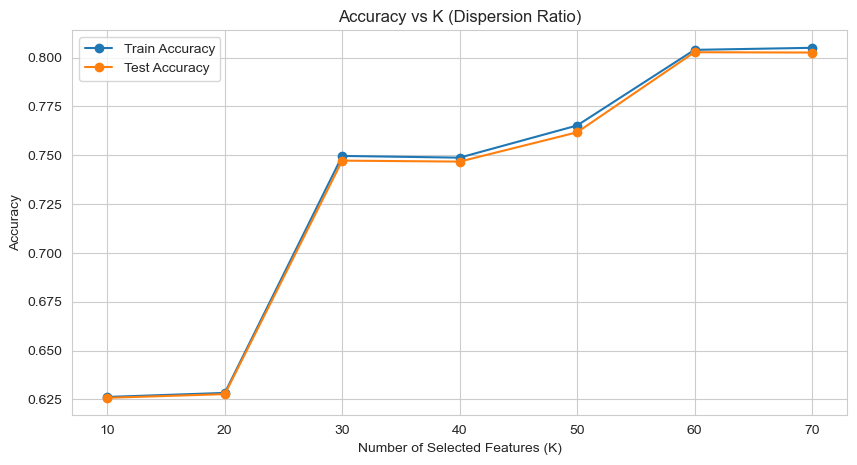

In [183]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc_list, marker="o", label="Train Accuracy")
plt.plot(k_values, test_acc_list,  marker="o", label="Test Accuracy")

plt.title("Accuracy vs K (Dispersion Ratio)")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

In [184]:
top60_dr = dr_df['feature'].head(60).tolist()
y_test_dr, y_pred_dr, train_acc_dr, test_acc_dr = run_logistic_regression(df_scaled[top60_dr], df["is_canceled"])

Train Accuracy: 0.8027472987687411
Test Accuracy : 0.8039535955103237


,precision,recall,f1-score,support
Not Canceled (0),0.800,0.916,0.854,15034.000
Canceled (1),0.810,0.610,0.696,8844.000
Accuracy,0.803,0.803,0.803,0.803
Macro Avg,0.805,0.763,0.775,23878.000
Weighted Avg,0.804,0.803,0.796,23878.000


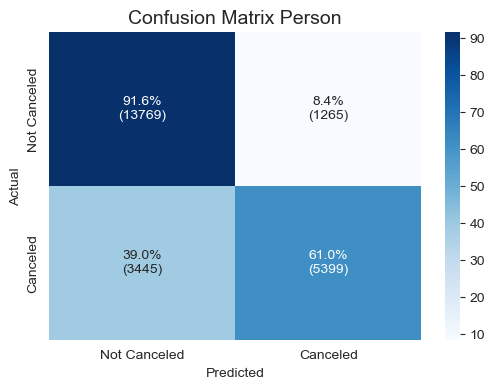

In [185]:
classification_report_table(y_test_dr, y_pred_dr)
plot_confusion_matrix_percent(y_test_dr, y_pred_dr, title='Confusion Matrix Person')

In [186]:
print("Selected features:", list(top60_dr))
print("\nRemoved features:", list(features.columns[~features.columns.isin(top60_dr)]))

Selected features: ['market_segment_Corporate', 'reserved_room_type_E', 'assigned_room_type_E', 'hotel_city_Indore', 'hotel_city_Lucknow', 'hotel_city_Kochi', 'hotel_city_Bangalore', 'hotel_city_Chennai', 'hotel_city_Mumbai', 'hotel_city_Goa', 'hotel_city_Kolkata', 'hotel_city_Delhi', 'hotel_city_Chandigarh', 'hotel_city_Hyderabad', 'hotel_city_Pune', 'hotel_city_Jaipur', 'hotel_city_Bhopal', 'is_repeated_guest', 'assigned_room_type_F', 'is_family', 'reserved_room_type_F', 'assigned_room_type_G', 'assigned_room_type_C', 'meal_SC', 'assigned_room_type_B', 'reserved_room_type_G', 'market_segment_Direct', 'meal_HB', 'deposit_type_Non Refund', 'distribution_channel_Direct', 'reserved_room_type_B', 'reserved_room_type_C', 'meal_FB', 'reserved_room_type_D', 'market_segment_Complementary', 'market_segment_Groups', 'assigned_room_type_H', 'reserved_room_type_H', 'customer_type_Group', 'days_in_waiting_list', 'market_segment_Offline TA/TO', 'assigned_room_type_I', 'children', 'customer_type_Tra

### Comparison

In [217]:
methods = {
    "Linear_Regression":(train_acc_lr, test_acc_lr),
    "Variance":(train_acc_dr, test_acc_var),
    "Mutual_Info": (train_acc_mi, test_acc_mi),
    "MAD":(train_acc_mad,test_acc_mad),
    "Chi2": (train_acc_chi, test_acc_chi),
    "Fisher": (train_acc_fisher, test_acc_fisher),
    "Pearson": (train_acc_person, test_acc_person),
    "ANOVA": (train_acc_anova, test_acc_anova),
    "Dispersion_ratio": (train_acc_dr, test_acc_dr)
}

df_plot = pd.DataFrame(
    [(m, v[0], v[1]) for m, v in methods.items()],
    columns=["method", "train_accuracy", "test_accuracy"]
)

df_plot

,method,train_accuracy,test_accuracy
0,Linear_Regression,0.806014,0.808780
1,Variance,0.802747,0.807356
2,Mutual_Info,0.801993,0.804718
3,MAD,0.801072,0.803242
4,Chi2,0.800695,0.801053
5,Fisher,0.805260,0.806812
6,Pearson,0.805637,0.806990
7,ANOVA,0.805260,0.806812
8,Dispersion_ratio,0.802747,0.803954


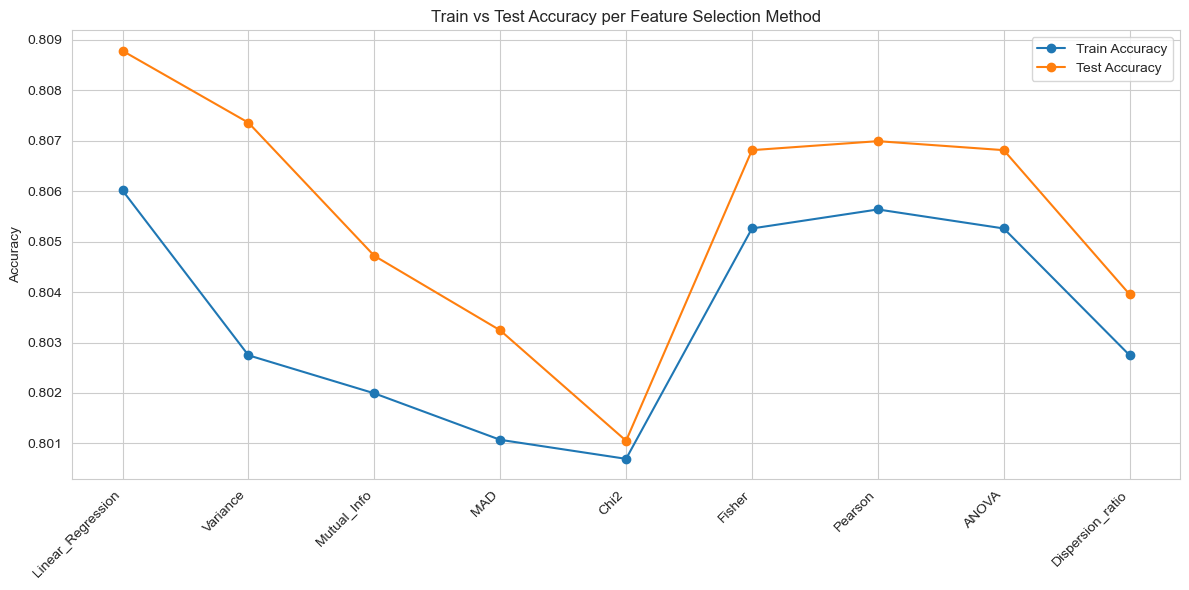

In [218]:
plt.figure(figsize=(12, 6))

plt.plot(df_plot["method"], df_plot["train_accuracy"], marker='o', label="Train Accuracy")
plt.plot(df_plot["method"], df_plot["test_accuracy"], marker='o', label="Test Accuracy")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy per Feature Selection Method")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


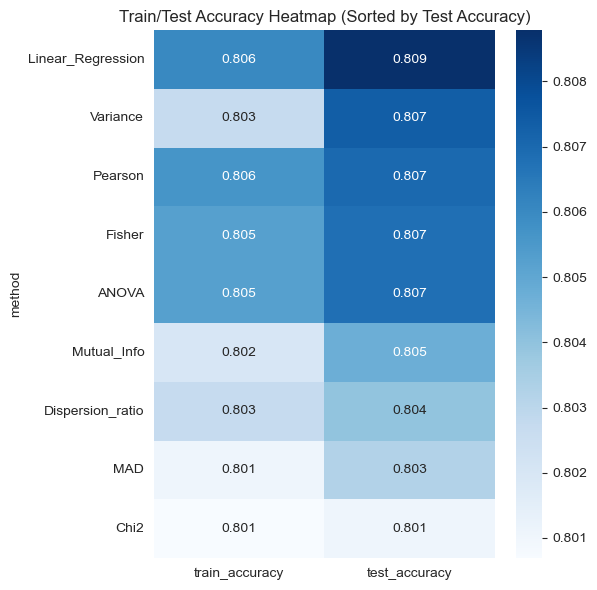

In [219]:
df_sorted = df_plot.sort_values("test_accuracy", ascending=False)

plt.figure(figsize=(6, 6))
seaborn.heatmap(
    df_sorted.set_index("method")[["train_accuracy", "test_accuracy"]],
    annot=True, cmap="Blues", fmt=".3f", cbar=True
)
plt.title("Train/Test Accuracy Heatmap (Sorted by Test Accuracy)")
plt.tight_layout()
plt.show()

In [220]:
selected_features = {
    "Variance": selected_features_var,
    "Mutual_Info": top25_features_mi,
    "MAD": top30_mad,
    "Chi2": top35_chi,
    "Fisher": top40_fisher,
    "Pearson": top40_person,
    "ANOVA": top40_anova,
    "Dispersion_ratio": top60_dr
}

In [221]:
# All unique features used by any selection method
all_features = sorted(set().union(*selected_features.values()))

# Table with ✔ and ✖
table = pd.DataFrame("", index=selected_features.keys(), columns=all_features)

for method, feats in selected_features.items():
    for feat in all_features:
        table.loc[method, feat] = "✔" if feat in feats else "✖"

table = table.T

In [222]:
def color_tick_x(val):
    if val == "✔":
        return "background-color: #8DF59A; color: black; font-weight: bold; text-align: center;"  # green
    elif val == "✖":
        return "background-color: #FF8A8A; color: black; font-weight: bold; text-align: center;"  # red
    return ""

styled_table = table.style.map(color_tick_x)
styled_table

,Variance,Mutual_Info,MAD,Chi2,Fisher,Pearson,ANOVA,Dispersion_ratio
adr,✔,✔,✔,✖,✔,✔,✔,✖
adults,✔,✔,✔,✖,✔,✔,✔,✖
arrival_date_day_of_month,✔,✖,✔,✖,✖,✖,✖,✖
arrival_date_month,✔,✖,✔,✖,✖,✖,✖,✖
arrival_date_week_number,✔,✖,✔,✖,✖,✖,✖,✖
assigned_room_type_B,✔,✖,✖,✔,✔,✔,✔,✔
assigned_room_type_C,✔,✖,✖,✔,✔,✔,✔,✔
assigned_room_type_D,✔,✔,✔,✔,✔,✔,✔,✔
assigned_room_type_E,✔,✖,✖,✔,✔,✔,✔,✔
assigned_room_type_F,✔,✖,✖,✔,✔,✔,✔,✔


In [228]:
# --- Build summary of selected/removed features ---
all_features = set().union(*selected_features.values())
total = len(all_features)

summary = pd.DataFrame({
    "method": list(selected_features.keys()),
    "selected_features": [len(v) for v in selected_features.values()],
})

summary["removed_features"] = summary["selected_features"].apply(lambda x: total - x)

# --- Merge with df_plot (accuracies) ---
df_final = df_plot.merge(summary, on="method")

filters_df = df_final.sort_values(
    ["test_accuracy", "train_accuracy"],
    ascending=[False, False]
)
filters_df

,method,train_accuracy,test_accuracy,selected_features,removed_features
0,Variance,0.802747,0.807356,57,16
5,Pearson,0.805637,0.806990,40,33
4,Fisher,0.805260,0.806812,40,33
6,ANOVA,0.805260,0.806812,40,33
1,Mutual_Info,0.801993,0.804718,25,48
7,Dispersion_ratio,0.802747,0.803954,60,13
2,MAD,0.801072,0.803242,30,43
3,Chi2,0.800695,0.801053,35,38


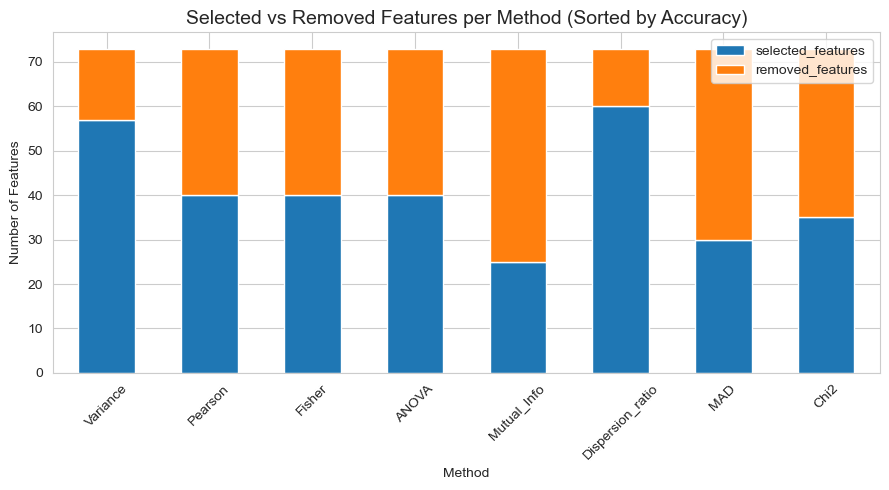

In [229]:
ax = filters_df.set_index("method")[["selected_features", "removed_features"]].plot(
    kind="bar",
    stacked=True,
    width=0.55,
    figsize=(9,5)
)

ax.set_title("Selected vs Removed Features per Method (Sorted by Accuracy)", fontsize=14)
ax.set_xlabel("Method")
ax.set_ylabel("Number of Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Wrapper methods

Wrapper methods are also referred as greedy algorithms that train algorithm. They use different combination of features and compute relation between these subset features and target variable and based on conclusion addition and removal of features are done. Stopping criteria for selecting the best subset are usually pre-defined by the person training the model such as when the performance of the model decreases or a specific number of features are achieved.

![Wrapper](wrapper.png)

### Sequential Forward Selection (SFS)

In [274]:
len(selected_features_var)

57

In [276]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

X_var = df_scaled[selected_features_var]   # 59 variance-selected features
y = df["is_canceled"]

model = LogisticRegression(max_iter=1000)

sfs = SFS(
    model,
    k_features="best",        # e.g. want 15 final features
    forward=True,
    floating=False,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=2
)

sfs.fit(X_var, y)
selected_sfs = list(sfs.k_feature_names_)
print("SFS selected:", selected_sfs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    6.2s finished

[2025-12-05 17:57:14] Features: 1/57 -- score: 0.7502307713132259[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.8s finished

[2025-12-05 17:57:16] Features: 2/57 -- score: 0.7508337857495474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.6s finished

[2025-12-05 17:57:18] Features: 3/57 -- score: 0.7675025252231538[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  54 o

SFS selected: ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_people', 'meal_HB', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'distribution_channel_TA/TO', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'deposit_type_Non Refund', 'customer_type_Transient-Party', 'hotel_city_Bangalore', 'hotel_city_Bhopal', 'hotel_city_Chandigarh', 'hotel_city_Chennai', 'hotel_city_Delhi', 'hotel_


[2025-12-05 18:03:18] Features: 57/57 -- score: 0.7326827556813148

In [250]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

if not os.path.exists(os.path.join(os.getcwd(), "sfs_df.csv")):

    model = LogisticRegression(max_iter=200)

    sfs = SFS(
        model,
        k_features="best",       # or pick a number like 15
        forward=True,
        floating=False,
        scoring="accuracy",
        cv=3,
        n_jobs=-1
    )

    sfs = sfs.fit(X, y)

    selected_sfs = list(sfs.k_feature_names_)

else:
    sfs_df = pd.read_csv('sfs_df.csv')
    selected_sfs = sfs_df['selected_feature'].tolist()


In [277]:
print(selected_sfs)
print(len(selected_sfs))

['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_people', 'meal_HB', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'distribution_channel_TA/TO', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'deposit_type_Non Refund', 'customer_type_Transient-Party', 'hotel_city_Bangalore', 'hotel_city_Bhopal', 'hotel_city_Chandigarh', 'hotel_city_Chennai', 'hotel_city_Delhi', 'hotel_city_Goa', 'ho

In [278]:
y_test_sfs, y_pred_sfs, _, _ = run_logistic_regression(df_scaled[selected_sfs], df["is_canceled"])

Train Accuracy: 0.8019515872351118
Test Accuracy : 0.8028960924739289


,precision,recall,f1-score,support
Not Canceled (0),0.795,0.924,0.855,15034.000
Canceled (1),0.821,0.595,0.690,8844.000
Accuracy,0.802,0.802,0.802,0.802
Macro Avg,0.808,0.759,0.772,23878.000
Weighted Avg,0.805,0.802,0.794,23878.000


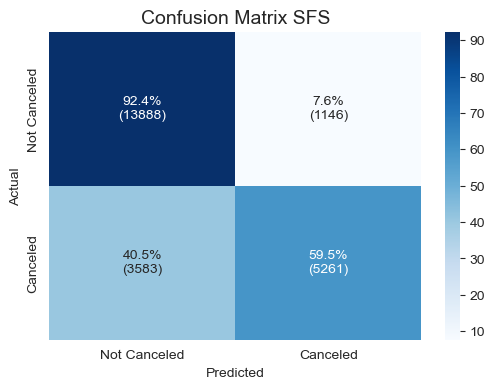

In [279]:
classification_report_table(y_test_sfs, y_pred_sfs)
plot_confusion_matrix_percent(y_test_sfs, y_pred_sfs, title='Confusion Matrix SFS')

In [273]:
print("Selected features:", list(selected_sfs))
print("\nRemoved features:", list(features.columns[~features.columns.isin(selected_sfs)]))

Selected features: ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_nights', 'market_segment_Groups', 'reserved_room_type_F', 'assigned_room_type_B', 'assigned_room_type_E', 'deposit_type_Non Refund', 'hotel_city_Bangalore', 'hotel_city_Bhopal', 'hotel_city_Chandigarh', 'hotel_city_Chennai', 'hotel_city_Delhi', 'hotel_city_Goa', 'hotel_city_Hyderabad', 'hotel_city_Indore', 'hotel_city_Jaipur', 'hotel_city_Kochi', 'hotel_city_Kolkata', 'hotel_city_Lucknow', 'hotel_city_Mumbai', 'hotel_city_Pune']

Removed features: ['lead_time', 'adults', 'children', 'babies', 'is_repeated_guest', 'adr', 'total_of_special_requests', 'total_people', 'is_family', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market

### Sequential Backward Selection (SBS)

In [280]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

X_var = df_scaled[selected_features_var]   # 59 variance-selected features
y = df["is_canceled"]

model = LogisticRegression(max_iter=1000)

sbs = SFS(
    model,
    k_features="best",        # e.g. want 15 final features
    forward=False,
    floating=False,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=2
)

sbs.fit(X_var, y)
selected_sbs = list(sbs.k_feature_names_)
print("SBS selected:", selected_sbs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   47.5s finished

[2025-12-05 18:08:29] Features: 56/1 -- score: 0.7728628454336027[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   39.4s finished

[2025-12-05 18:09:09] Features: 55/1 -- score: 0.7759871594661609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   39.9s finished

[2025-12-05 18:09:49] Features: 54/1 -- score: 0.7776791533794333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  54 o

SFS selected: ['previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment_Online TA', 'deposit_type_Non Refund', 'customer_type_Transient']


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2025-12-05 18:19:47] Features: 1/1 -- score: 0.7502307713132259

In [282]:
print(selected_sbs)
print(len(selected_sbs))

['previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment_Online TA', 'deposit_type_Non Refund', 'customer_type_Transient']
7


In [283]:
y_test_sbs, y_pred_sbs, _, _ = run_logistic_regression(df_scaled[selected_sbs], df["is_canceled"])

Train Accuracy: 0.7987268615461931
Test Accuracy : 0.7977761025254428


,precision,recall,f1-score,support
Not Canceled (0),0.801,0.904,0.850,15034.000
Canceled (1),0.792,0.619,0.695,8844.000
Accuracy,0.799,0.799,0.799,0.799
Macro Avg,0.797,0.762,0.772,23878.000
Weighted Avg,0.798,0.799,0.792,23878.000


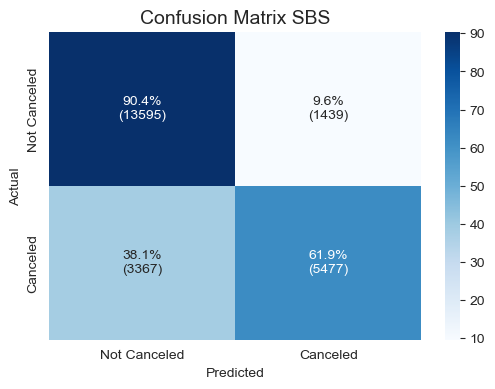

In [284]:
classification_report_table(y_test_sbs, y_pred_sbs)
plot_confusion_matrix_percent(y_test_sbs, y_pred_sbs, title='Confusion Matrix SBS')

### Recursive Feature Elimination (RFE)

In [285]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# choose how many features you want
num_features = 15

rfe = RFE(
    estimator=LogisticRegression(max_iter=1000),   # RFE needs the core model
    n_features_to_select=num_features
)

rfe.fit(df_scaled[selected_features_var], y)

selected_rfe = [f for f, keep in zip(selected_features_var, rfe.support_) if keep]
print("RFE selected features:", selected_rfe)

RFE selected features: ['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment_Online TA', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_G', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'deposit_type_Non Refund', 'country_freq']


In [286]:
y_test_rfe, y_pred_rfe, _, _ = run_logistic_regression(df_scaled[selected_rfe], df["is_canceled"])

Train Accuracy: 0.7875450205209816
Test Accuracy : 0.7903526406164929


,precision,recall,f1-score,support
Not Canceled (0),0.784,0.915,0.844,15034.000
Canceled (1),0.798,0.571,0.666,8844.000
Accuracy,0.788,0.788,0.788,0.788
Macro Avg,0.791,0.743,0.755,23878.000
Weighted Avg,0.789,0.788,0.778,23878.000


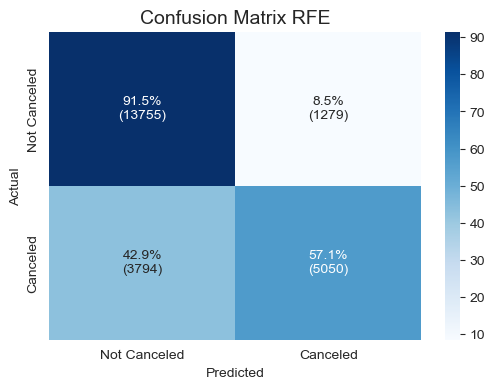

In [287]:
classification_report_table(y_test_rfe, y_pred_rfe)
plot_confusion_matrix_percent(y_test_rfe, y_pred_rfe, title='Confusion Matrix RFE')

## Embedded